In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, r2_score,roc_curve
%matplotlib inline

In [62]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [63]:
print train.shape
print test.shape

(1460, 82)
(1459, 81)


In [64]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [65]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## Data preprocessing:
We're not going to do anything fancy here:
1. First I'll transform the skewed numeric features by taking log(feature + 1) - this will make the features more normal
2. Create Dummy variables for the categorical features
3. Replace the numeric missing values (NaN's) with the mean of their respective columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122824a10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12292d1d0>]], dtype=object)

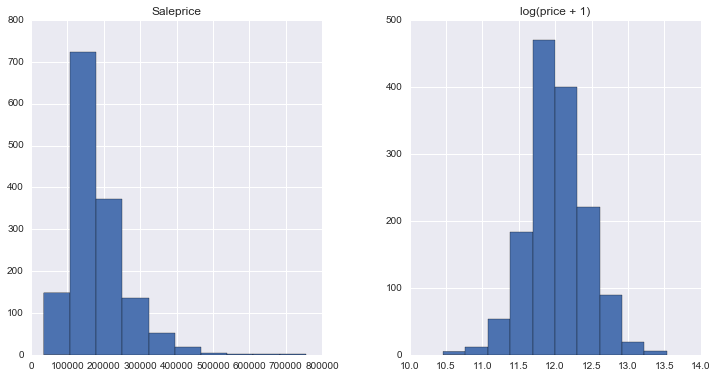

In [67]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"Saleprice":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

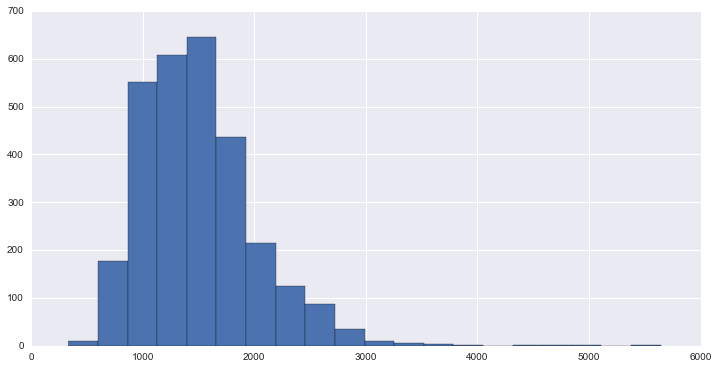

In [7]:
all_data["GrLivArea"].hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128b12f50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x128ed6a50>]], dtype=object)

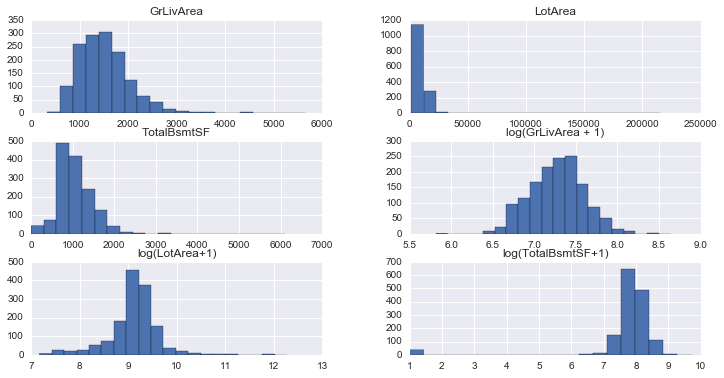

In [76]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"GrLivArea":train["GrLivArea"], "log(GrLivArea + 1)":np.log1p(train["GrLivArea"]+1),
                      "LotArea": train["LotArea"], "log(LotArea+1)": np.log1p(train["LotArea"]+1),
                      "TotalBsmtSF":train["TotalBsmtSF"], "log(TotalBsmtSF+1)": np.log1p(train["TotalBsmtSF"])+1})
prices.hist(bins=20)

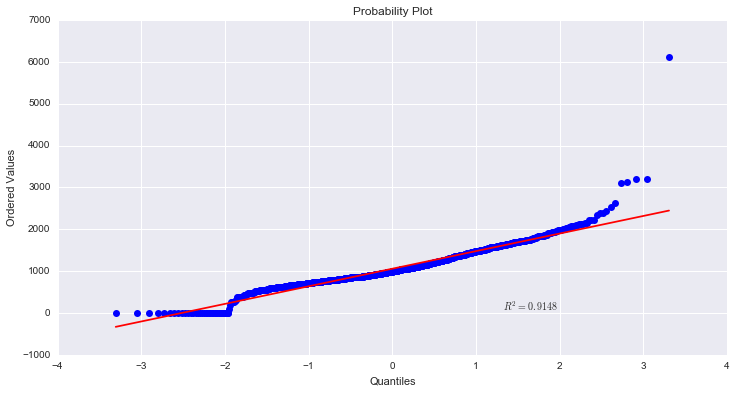

In [83]:
import scipy.stats as stats
import pylab
#stats.probplot(np.log1p(train["TotalBsmtSF"]+1), dist="norm", plot=pylab)
stats.probplot(train["TotalBsmtSF"], dist="norm", plot=pylab)
pylab.show()
#stats.normaltest(train["GrLivArea"])

/Users/ipm/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)
/Users/ipm/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3578: RuntimeWarning: Invalid value encountered in median for 1 results
  RuntimeWarning)
/Users/ipm/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3569: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)
/Users/ipm/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


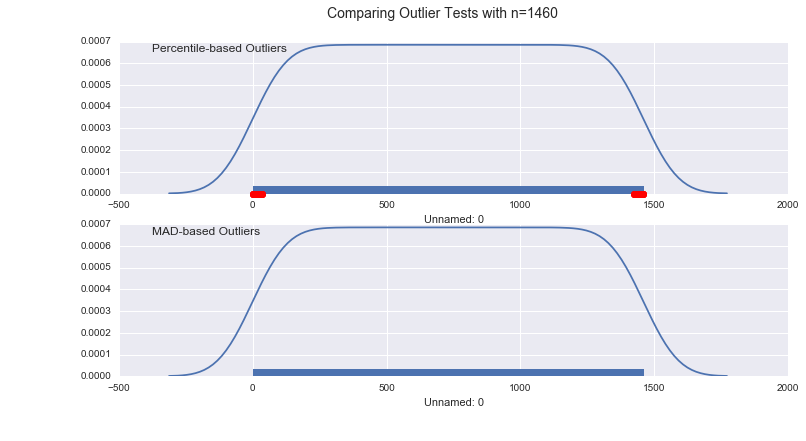

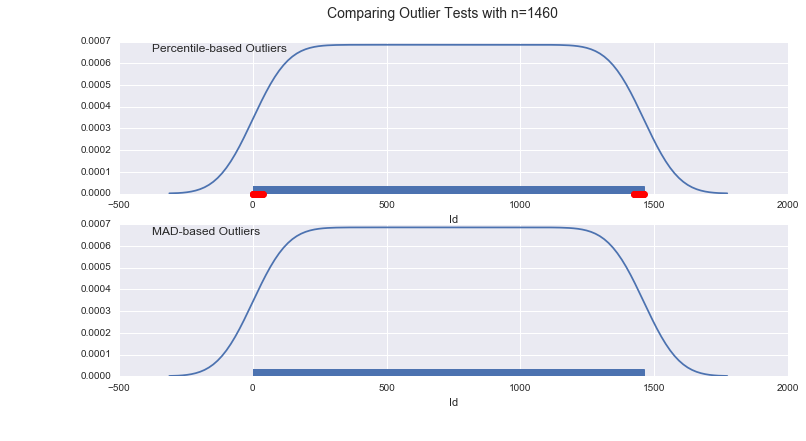

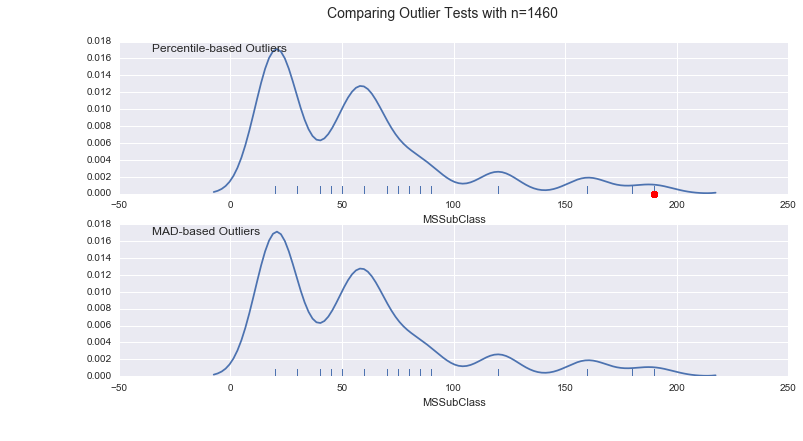

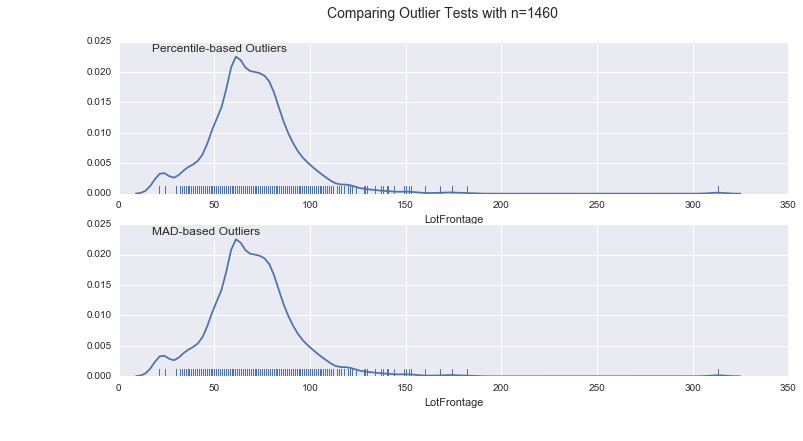

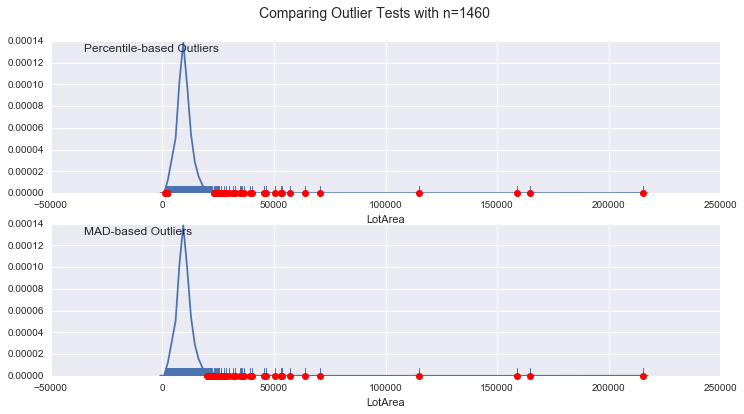

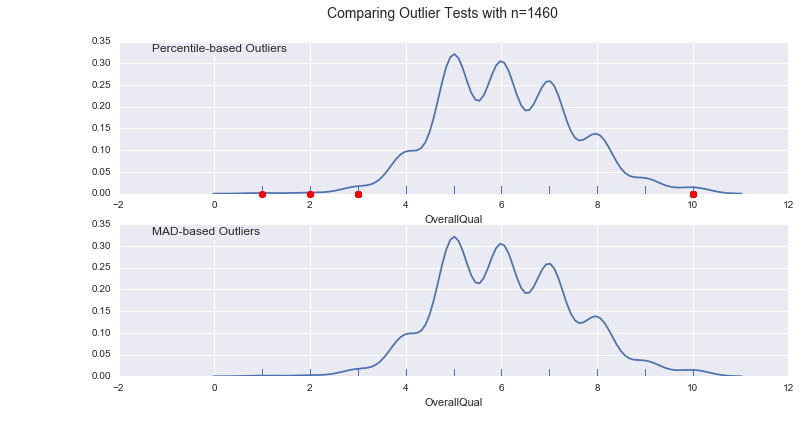

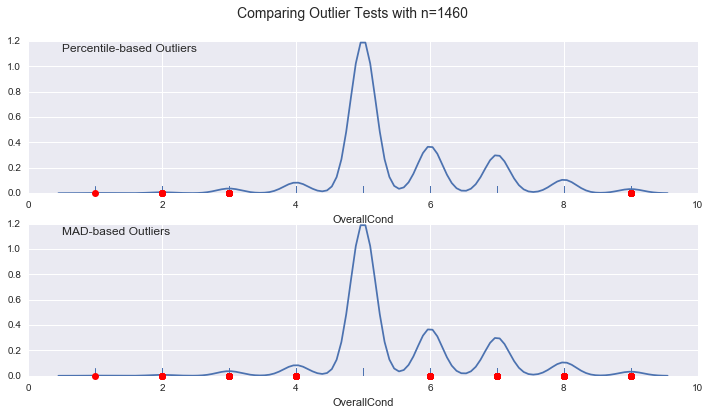

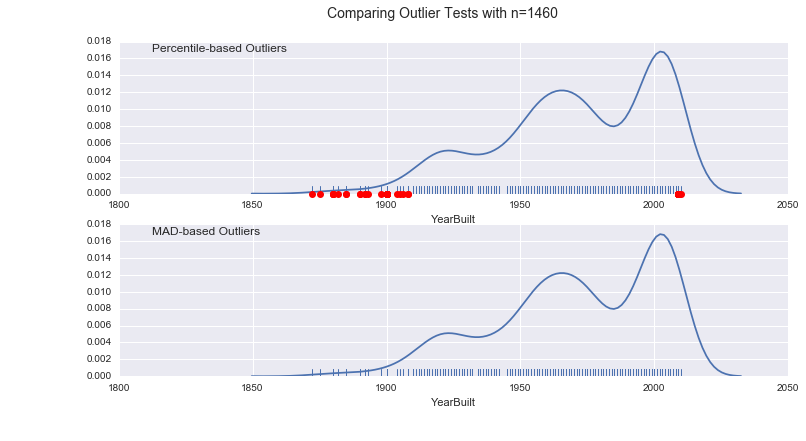

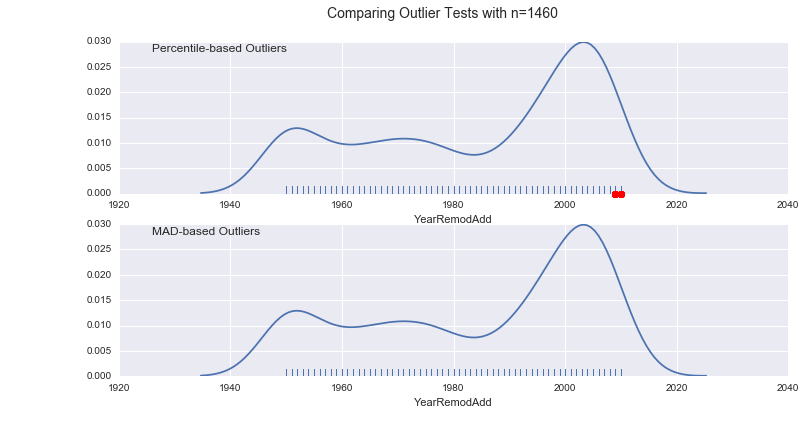

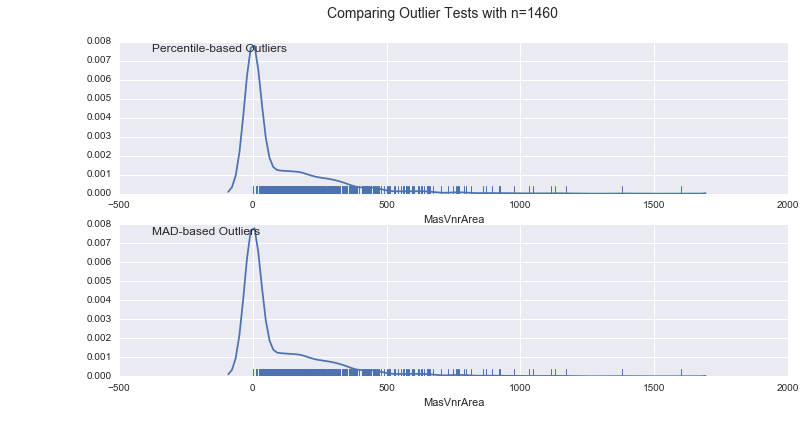

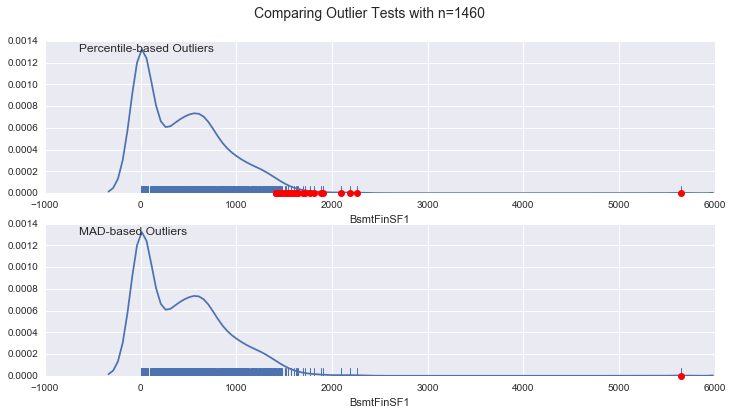

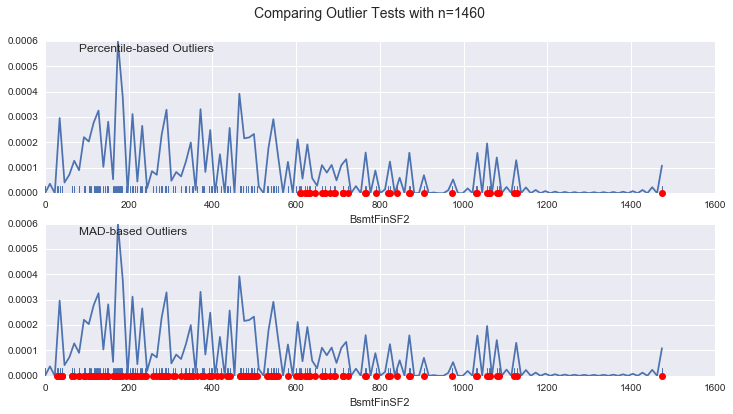

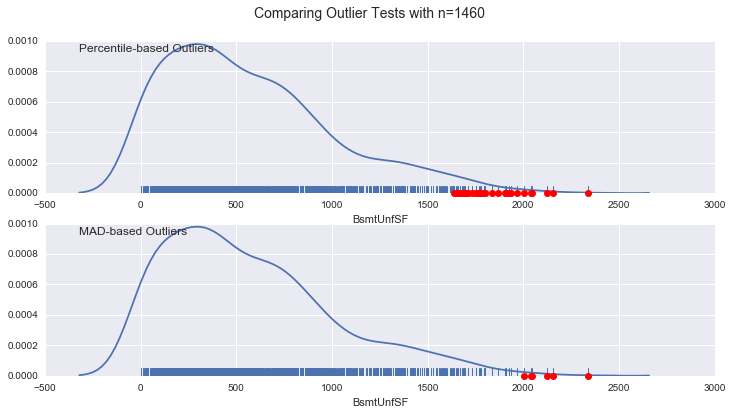

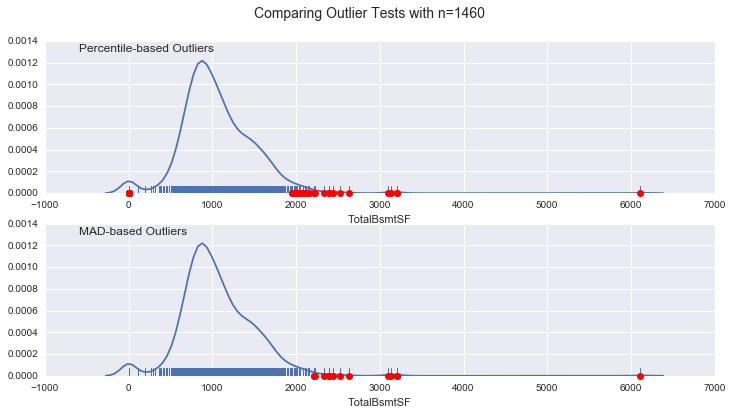

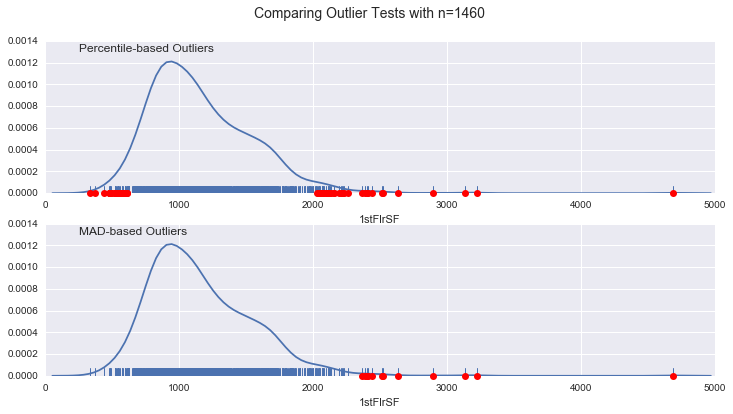

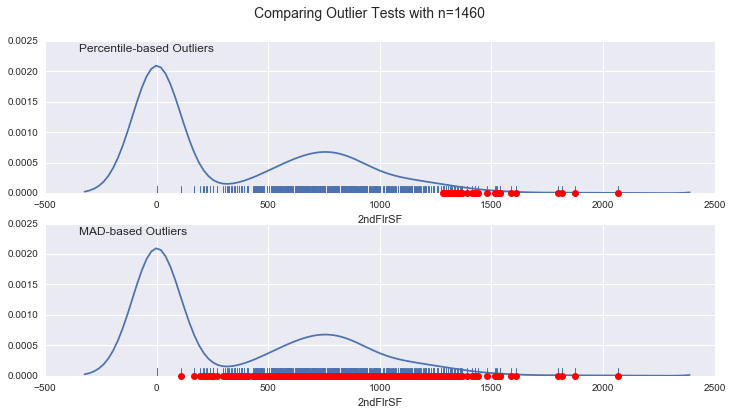

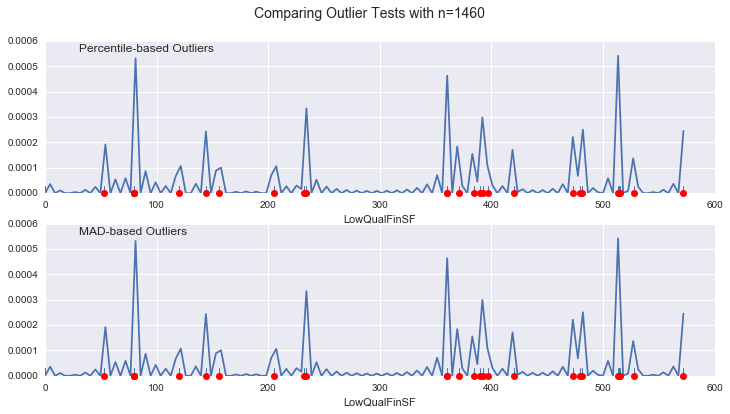

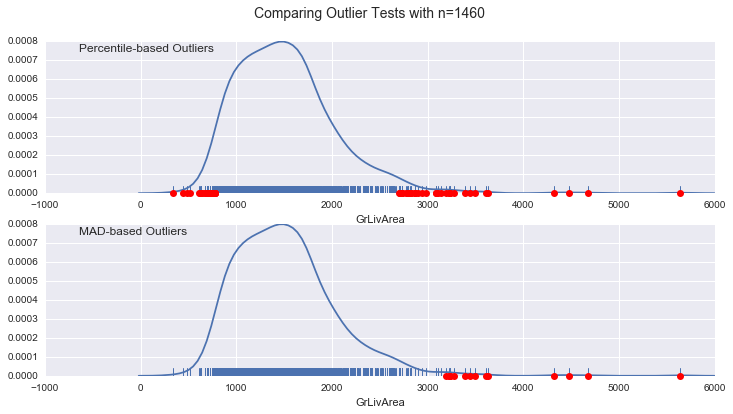

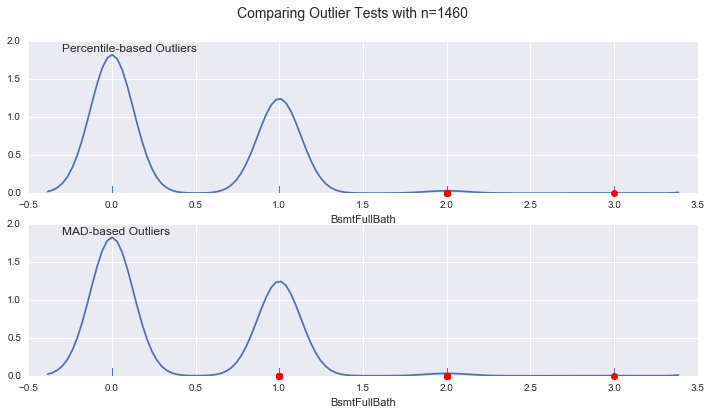

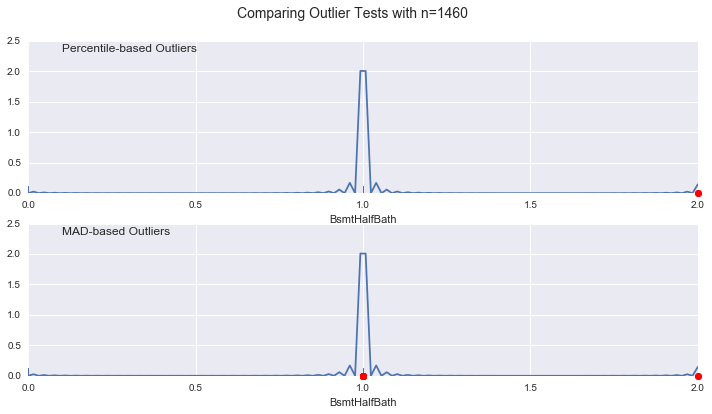

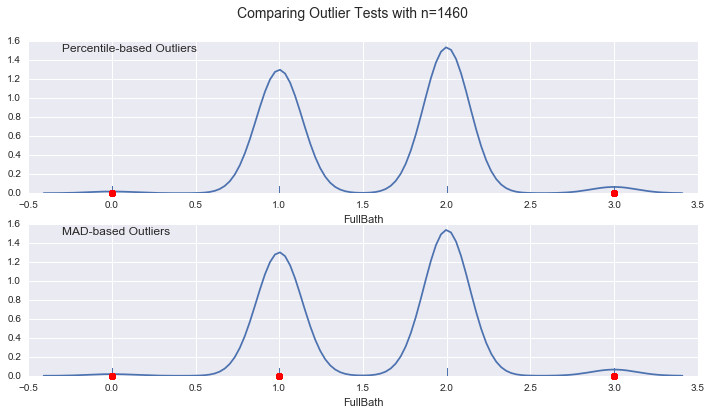

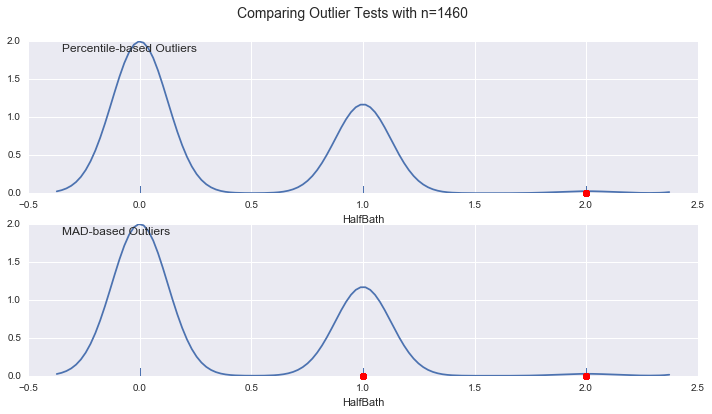

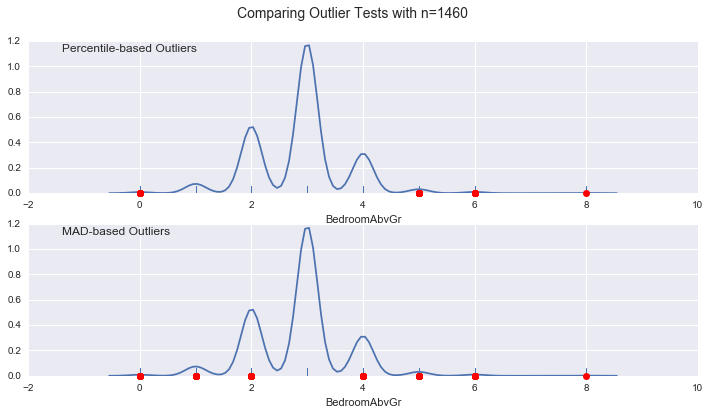

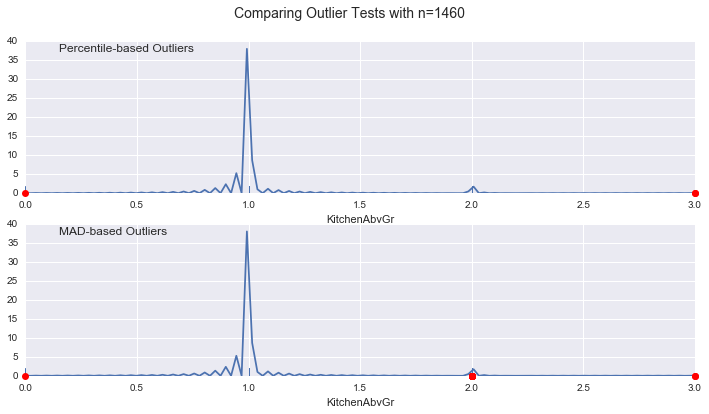

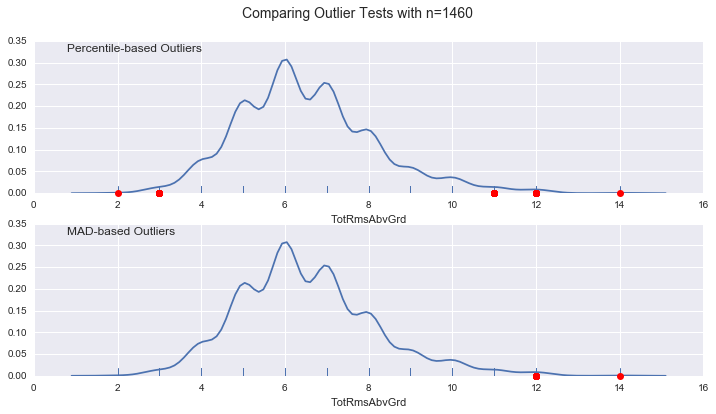

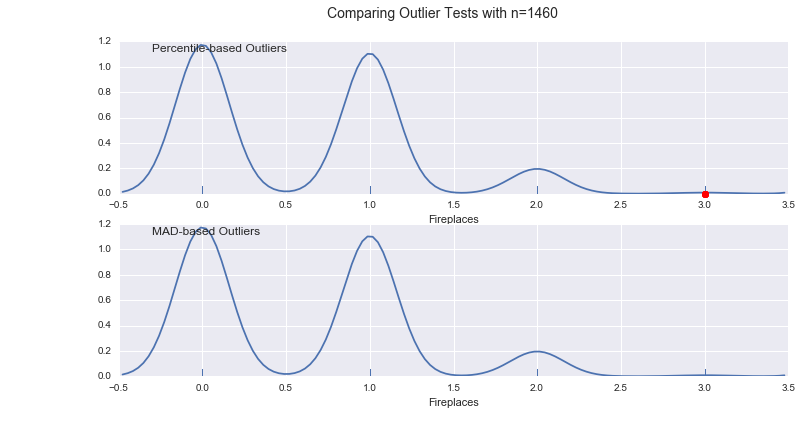

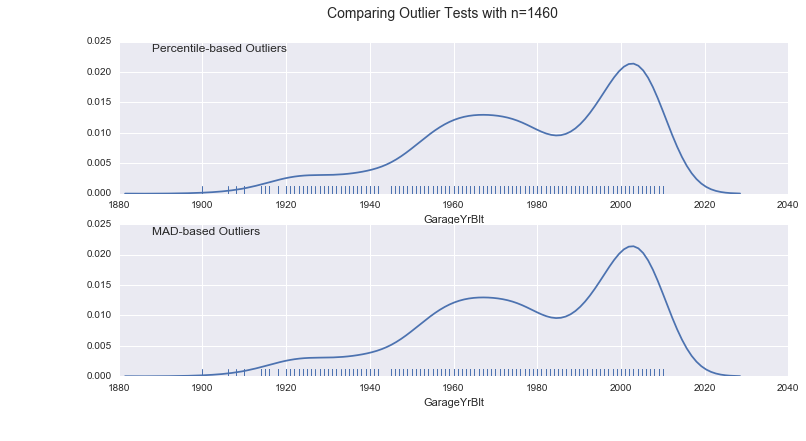

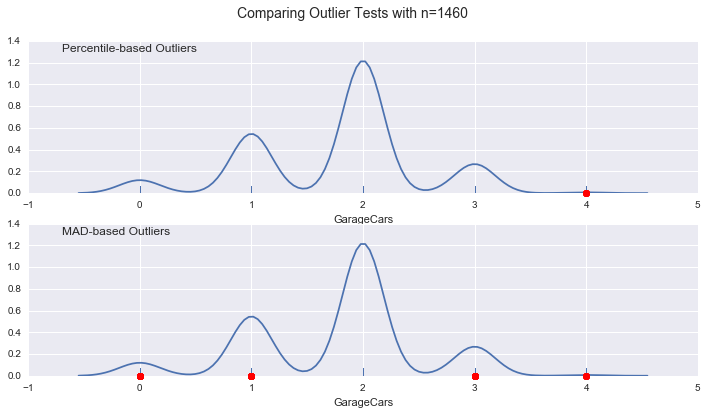

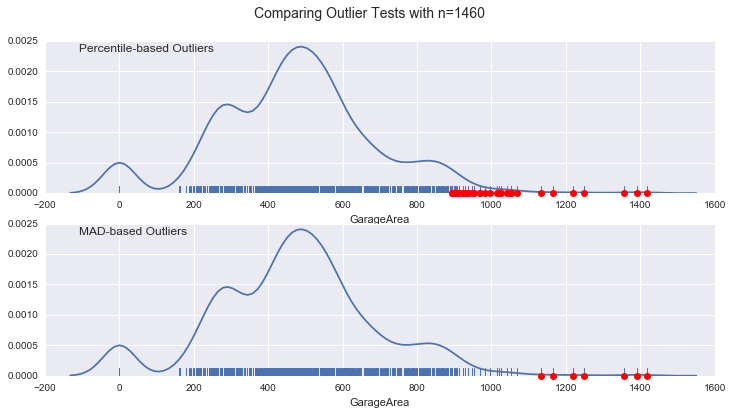

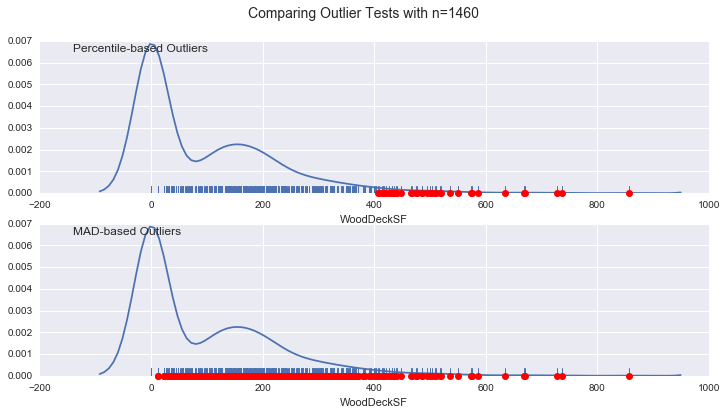

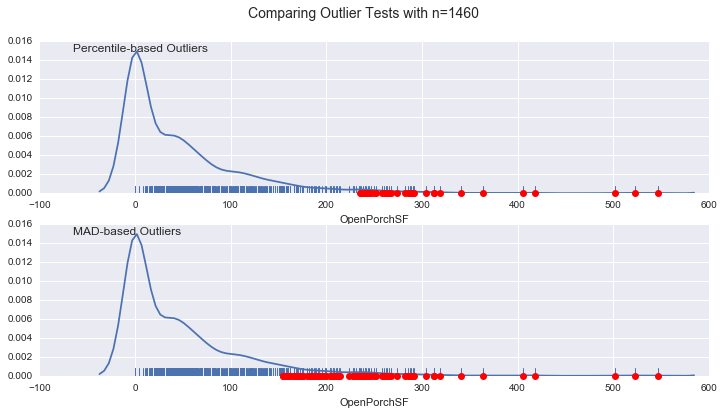

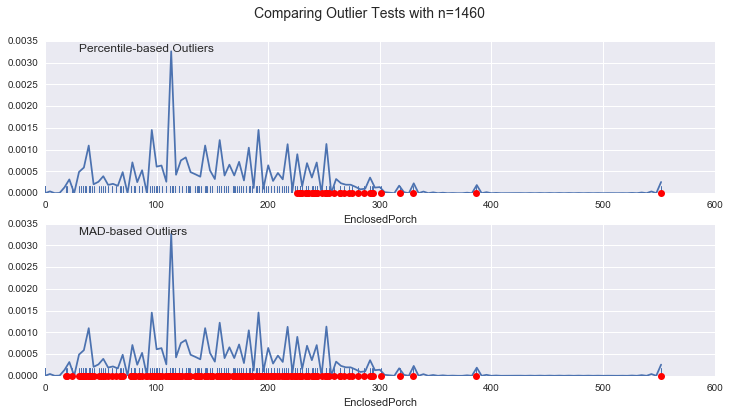

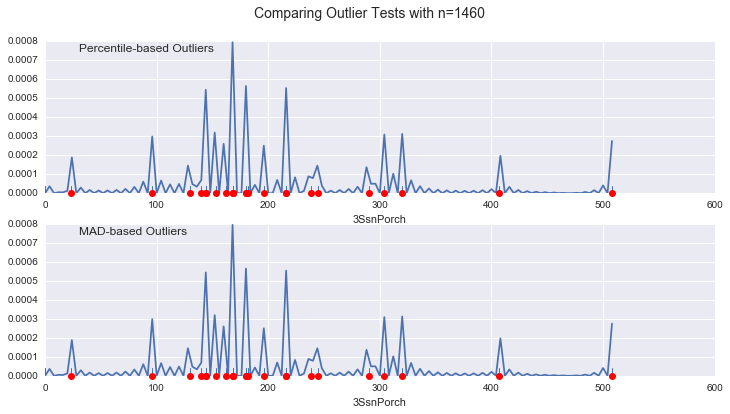

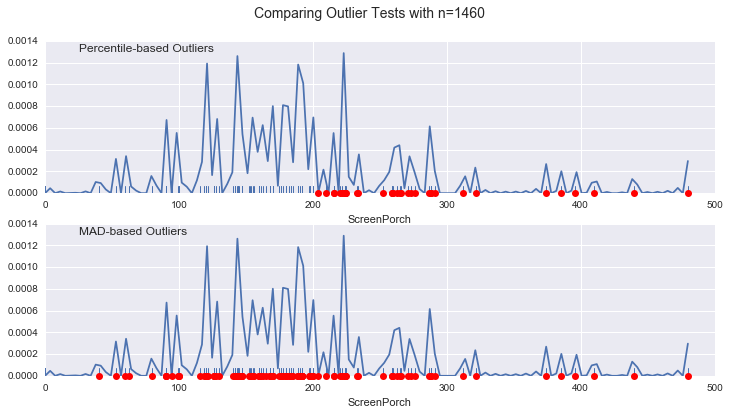

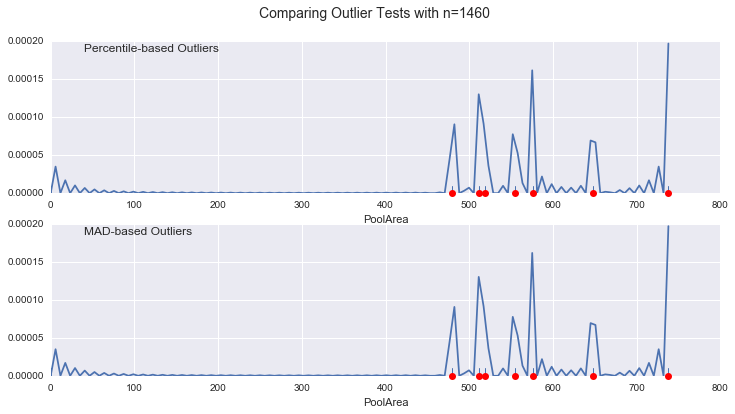

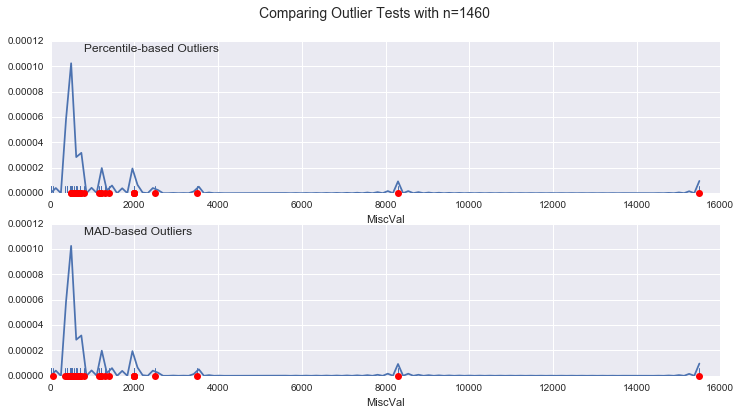

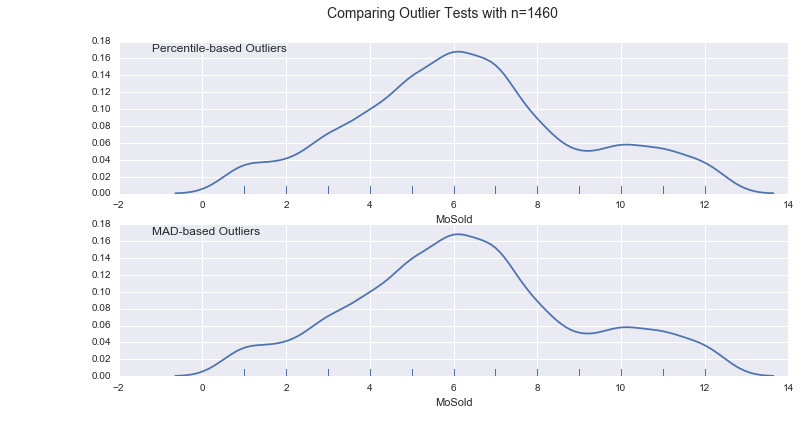

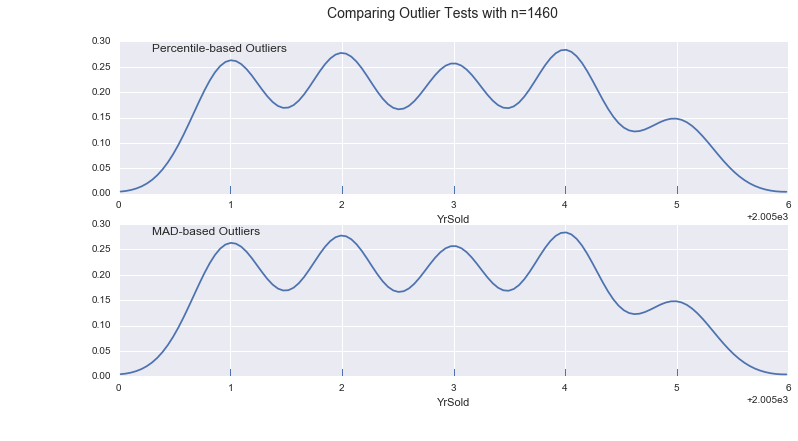

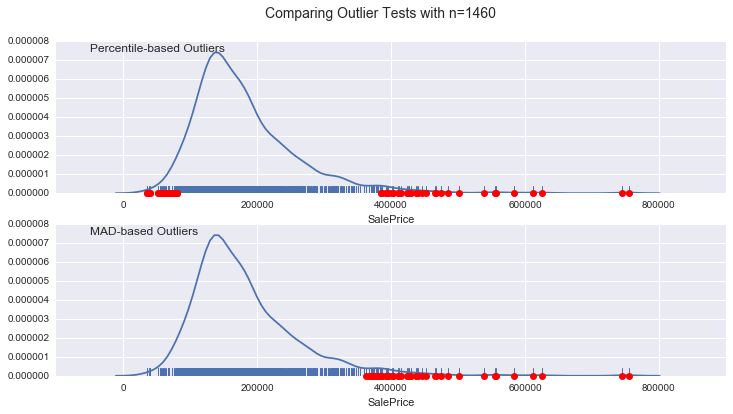

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def main():
    for col in train.columns:
        if train[col].dtype != 'object':
            plot(train[col])
    #for num in [10, 50, 100, 1000]:
     #   Generate some data
          #x = np.random.normal(0, 0.5, num-3)
#
 #      x = np.r_[x, -3, -10, 12]
            

    plt.show()

def doubleMADsfromMedian(y,thresh=3.5):
    # warning: this function does not check for NAs
    # nor does it address issues when 
    # more than 50% of your data have identical values
    m = np.median(y)
    abs_dev = np.abs(y - m)
    left_mad = np.median(abs_dev[y <= m])
    right_mad = np.median(abs_dev[y >= m])
    y_mad = left_mad * np.ones(len(y))
    y_mad[y > m] = right_mad
    modified_z_score = 0.6745 * abs_dev / y_mad
    modified_z_score[y == m] = 0
    return modified_z_score > thresh

def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

def plot(x):
    fig, axes = plt.subplots(nrows=2)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top')
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=14)

main()

In [8]:
train.groupby(["Neighborhood", "YrSold"])["SalePrice"].agg([np.mean, len])

mean  len
Neighborhood YrSold             
Blmngtn      2006    217087    7
             2007    183350    2
             2008    175447    2
             2009    176720    5
             2010    192000    1
Blueste      2008    151000    1
             2009    124000    1
BrDale       2006     96750    4
             2007    113833    3
             2008     95225    4
             2009    118625    4
             2010     88000    1
BrkSide      2006    112746   15
             2007    135737   10
             2008    121707   14
             2009    134994   17
             2010     96500    2
ClearCr      2006    199166    6
             2007    236333    6
             2008    208991    8
             2009    169875    4
             2010    246850    4
CollgCr      2006    199016   32
             2007    213999   30
             2008    187718   36
             2009    192317   39
             2010    203700   13
Crawfor      2006    196635   11
             2007    198777   19
             2008    254411    9
...                     ...  ...
SWISU        2009    141048    8
             2010    141333    3
Sawyer       2006    149735   17
             2007    133935   17
             2008    128900   13
             2009    136925   11
             2010    132400   16
SawyerW      2006    164787    8
             2007    209300   12
             2008    184080   11
             2009    183934   15
             2010    184076   13
Somerst      2006    210268   16
             2007    233248   24
             2008    225631   20
             2009    236315   18
             2010    206762    8
StoneBr      2006    365046    6
             2007    279585    5
             2008    245000    4
             2009    319967    5
             2010    318886    5
Timber       2006    264485    7
             2007    229470   11
             2008    234361    7
             2009    245437    8
             2010    245160    5
Veenker      2006    273333    3
             2007    214900    5
             2008    244000    3

[119 rows x 2 columns]

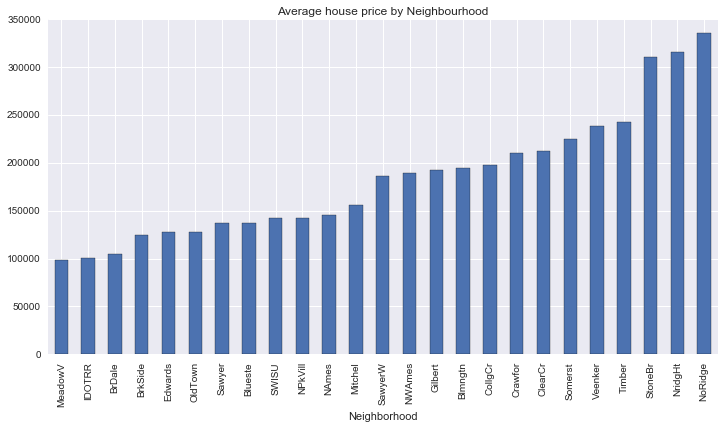

In [9]:
t = train.groupby(["Neighborhood"])["SalePrice"].mean().sort_values()
t.plot(kind='bar')
plt.title("Average house price by Neighbourhood")

There is significant difference in house prices based on neighbourhood... This could be an important variable in prediction

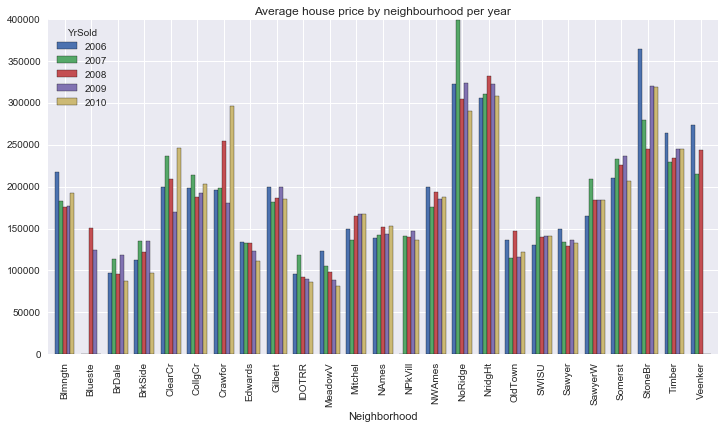

In [10]:
t = train.groupby(["Neighborhood", "YrSold"])["SalePrice"].mean().unstack()
my_plot = t.plot(kind='bar',stacked=False,title="Average house price by neighbourhood per year", width=0.75)

In [11]:
area = train[["LotArea","LotFrontage","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", 
       "GarageArea", "WoodDeckSF", "OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch", "PoolArea"]]

In [12]:
train["Yrs_renov"] = train["YearRemodAdd"] - train["YearBuilt"]

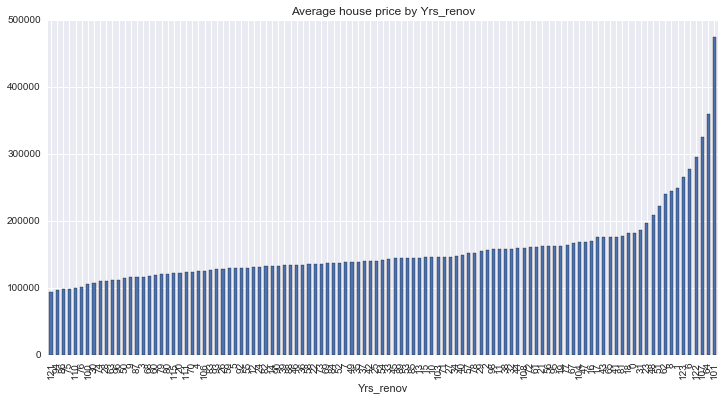

In [13]:
t = train.groupby(["Yrs_renov"])["SalePrice"].mean().sort_values()
t.plot(kind='bar')
plt.title("Average house price by Yrs_renov")

In [14]:
#duplicate columns
remove = []
cols = test.columns
for i in range(len(cols)-1):
    for j in range(i+1, len(cols)):
        if np.array_equal(train[cols[i]].values, train[cols[j]].values):
            remove.append(cols[j])
train.drop(remove, axis=1, inplace=True)
test.drop(remove, axis=1, inplace=True)

/Users/ipm/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:2515: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  return bool(asarray(a1 == a2).all())


In [15]:
# Check if we have any columns with constant std
remove = []
for col in train.columns:
    if train[col].dtype != 'object':
        if train[col].std() == 0:
            remove.append(col)
train.drop(remove, axis=1, inplace=True)
#test.drop(remove, axis=1, inplace=True)
remove

[]

In [16]:
train["Total_usable_area"] = train["TotalBsmtSF"] + train["GarageArea"] +train["GrLivArea"]

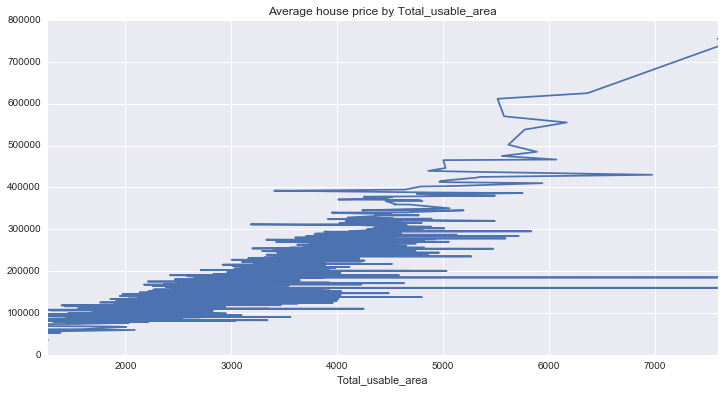

In [17]:
t = train.groupby(["Total_usable_area"])["SalePrice"].mean().sort_values()
t.plot()
plt.title("Average house price by Total_usable_area")

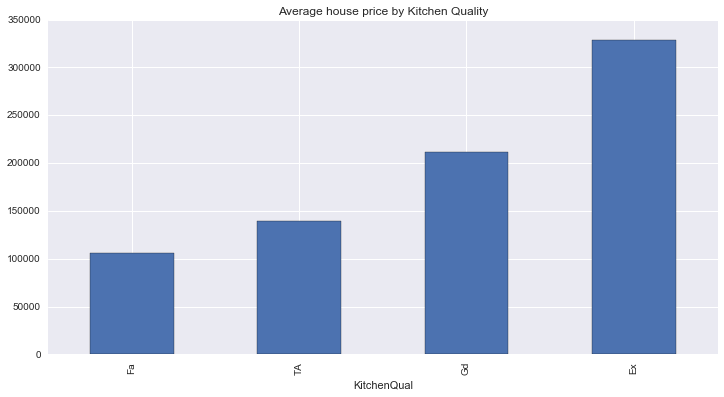

In [18]:
t = train.groupby(["KitchenQual"])["SalePrice"].mean().sort_values()
t.plot(kind='bar')
plt.title("Average house price by Kitchen Quality")

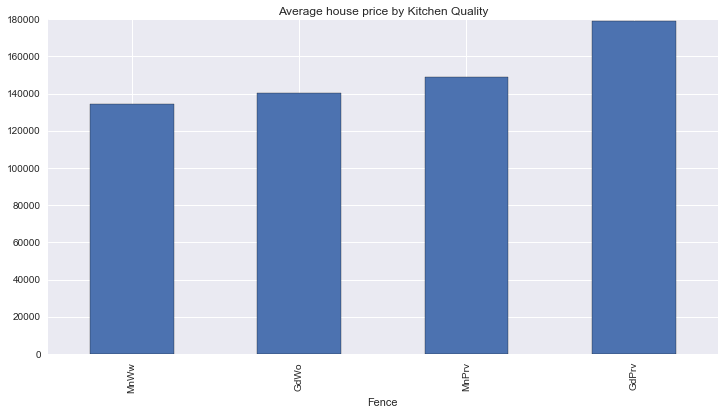

In [19]:
t = train.groupby(["Fence"])["SalePrice"].mean().sort_values()
t.plot(kind='bar')
plt.title("Average house price by Kitchen Quality")

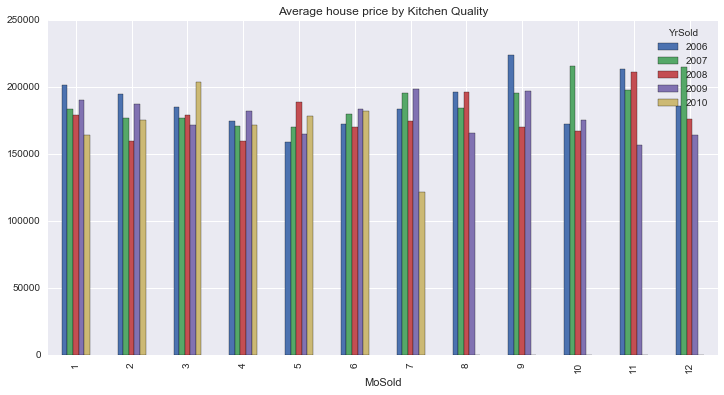

In [20]:
t = train.groupby(["MoSold","YrSold"])["SalePrice"].mean().unstack()
t.plot(kind='bar', stacked=False)
plt.title("Average house price by Kitchen Quality")

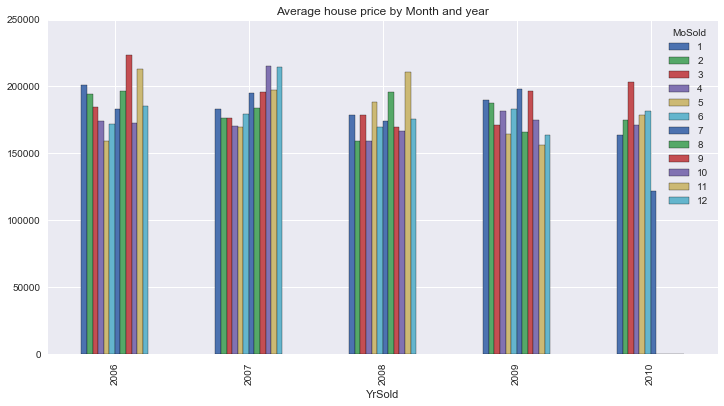

In [21]:
t = train.groupby(["YrSold","MoSold"])["SalePrice"].mean().unstack()
t.plot(kind='bar', stacked=False)
plt.title("Average house price by Month and year")

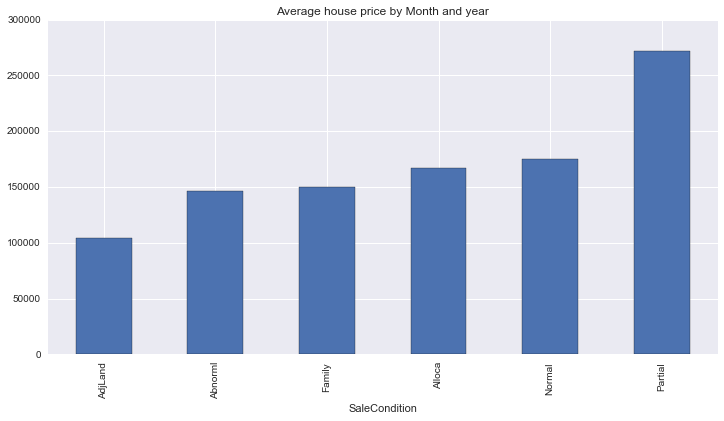

In [22]:
t = train.groupby(["SaleCondition"])["SalePrice"].mean().sort_values()
t.plot(kind='bar', stacked=False)
plt.title("Average house price by Month and year")

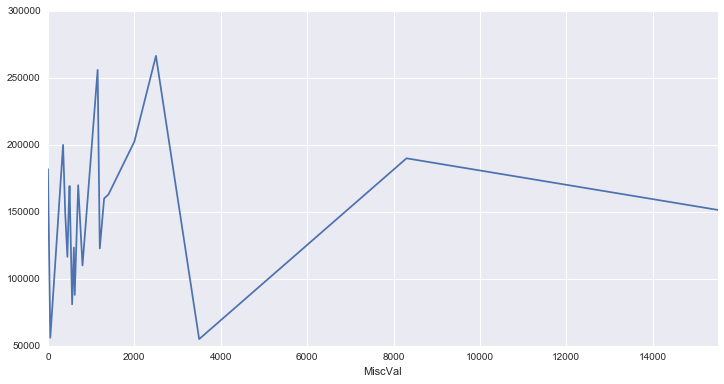

In [23]:
t = train.groupby(["MiscVal"])["SalePrice"].mean()
t.plot()

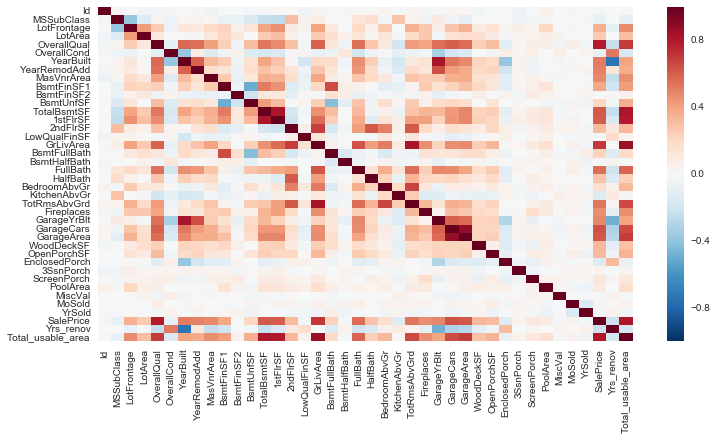

In [24]:
sns.heatmap(train.corr())

In [25]:
vars_to_drop = ["GarageYrBlt",  "TotalBsmtSF", "TotRmsAbvGrd", "Total_usable_area","GarageCars", "Yrs_renov"] 
train.drop(vars_to_drop, axis=1, inplace=True)
vars_to_drop = ["GarageYrBlt",  "TotalBsmtSF", "TotRmsAbvGrd","GarageCars"] 
test.drop(vars_to_drop, axis=1, inplace=True)

In [26]:
train.shape, test.shape

((1460, 77), (1459, 76))

In [27]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
num_cols = []
for col in train.columns:
    if train[col].dtype != 'object':
        num_cols.append(col)
vif_tr = train[num_cols]
vif_tr.loc[vif_tr["LotFrontage"].isnull(),"LotFrontage"]=0
vif_tr.loc[vif_tr["MasVnrArea"].isnull(),"MasVnrArea"]=0
vif_tr.drop("SalePrice", axis=1, inplace = True)
vif_tr.isnull().sum()

In [179]:
from scipy.stats import skew
from scipy.stats.stats import pearsonr

#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = train.dtypes[train.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 1]
print skewed_feats
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

MSSubClass        1.406210
LotFrontage       2.160866
LotArea          12.195142
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
1stFlrSF          1.375342
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtHalfBath      4.099186
KitchenAbvGr      4.483784
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
dtype: float64


In [180]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif_(X):
    thresh = 10.0
    variables = range(X.shape[1])
    dropped=True
    while (dropped==True):
        dropped=False
        vif = [variance_inflation_factor(X[variables].values, ix) for ix in range(X[variables].shape[1])]
        #print vif
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[variables]

calculate_vif_(vif_tr)

dropping '1stFlrSF' at index: 12
dropping 'YrSold' at index: 31
dropping 'YearRemodAdd' at index: 7
dropping 'YearBuilt' at index: 6
dropping 'GrLivArea' at index: 12
dropping 'OverallQual' at index: 4
dropping 'KitchenAbvGr' at index: 16
dropping 'BedroomAbvGr' at index: 15
dropping 'FullBath' at index: 13
dropping 'OverallCond' at index: 4
Remaining variables:
Index([u'Id', u'MSSubClass', u'LotFrontage', u'LotArea', u'MasVnrArea',
       u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF', u'2ndFlrSF',
       u'LowQualFinSF', u'BsmtFullBath', u'BsmtHalfBath', u'HalfBath',
       u'Fireplaces', u'GarageArea', u'WoodDeckSF', u'OpenPorchSF',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal',
       u'MoSold'],
      dtype='object')


,Id,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,1,60,65.0,8450,196.0,706,0,150,854,0,...,0,548,0,61,0,0,0,0,0,2
1,2,20,80.0,9600,0.0,978,0,284,0,0,...,1,460,298,0,0,0,0,0,0,5
2,3,60,68.0,11250,162.0,486,0,434,866,0,...,1,608,0,42,0,0,0,0,0,9
3,4,70,60.0,9550,0.0,216,0,540,756,0,...,1,642,0,35,272,0,0,0,0,2
4,5,60,84.0,14260,350.0,655,0,490,1053,0,...,1,836,192,84,0,0,0,0,0,12
5,6,50,85.0,14115,0.0,732,0,64,566,0,...,0,480,40,30,0,320,0,0,700,10
6,7,20,75.0,10084,186.0,1369,0,317,0,0,...,1,636,255,57,0,0,0,0,0,8
7,8,60,0.0,10382,240.0,859,32,216,983,0,...,2,484,235,204,228,0,0,0,350,11
8,9,50,51.0,6120,0.0,0,0,952,752,0,...,2,468,90,0,205,0,0,0,0,4
9,10,190,50.0,7420,0.0,851,0,140,0,0,...,2,205,0,4,0,0,0,0,0,1


In [ ]:
dropping '1stFlrSF' at index: 12
dropping 'YrSold' at index: 31
dropping 'YearRemodAdd' at index: 7
dropping 'YearBuilt' at index: 6
dropping 'GrLivArea' at index: 12
dropping 'OverallQual' at index: 4
dropping 'KitchenAbvGr' at index: 16
dropping 'BedroomAbvGr' at index: 15
dropping 'FullBath' at index: 13
dropping 'OverallCond' at index: 4

test.drop(["1stFlrSF","YrSold","YearRemodAdd","YearBuilt","GrLivArea","OverallQual",""])

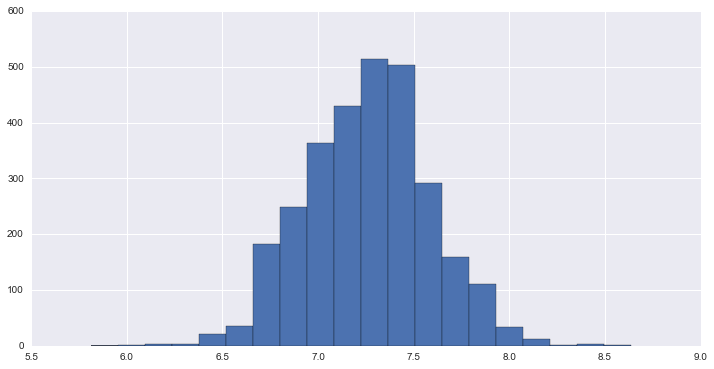

In [147]:
all_data["GrLivArea"].hist(bins=20)

In [183]:
test.shape

(1459, 76)

In [29]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [30]:
all_data = pd.get_dummies(all_data)

In [31]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [32]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

## Models
Now we are going to use regularized linear regression models from the scikit learn module. I'm going to try both l_1(Lasso) and l_2(Ridge) regularization. I'll also define a function that returns the cross-validation rmse error so we can evaluate our models and pick the best tuning par

In [33]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [34]:
model_ridge = Ridge()

The main tuning parameter for the Ridge model is alpha - a regularization parameter that measures how flexible our model is. The higher the regularization the less prone our model will be to overfit. However it will also lose flexibility and might not capture all of the signal in the data.

In [35]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 8, 10,12, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

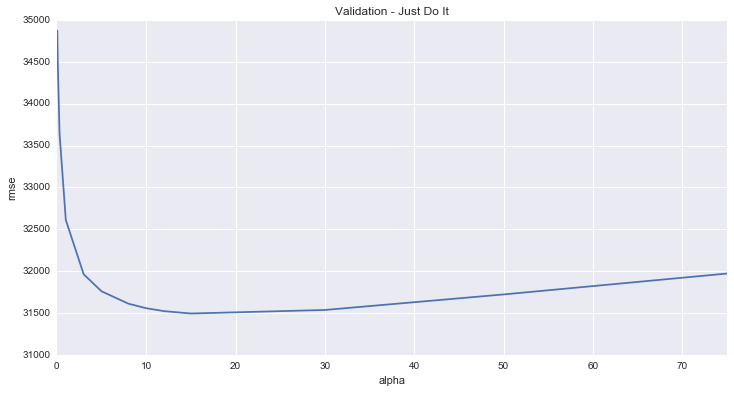

In [36]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

Note the U-ish shaped curve above. When alpha is too large the regularization is too strong and the model cannot capture all the complexities in the data. If however we let the model be too flexible (alpha small) the model begins to overfit. A value of alpha = 10 is about right based on the plot above.

In [37]:
cv_ridge.min()

31493.411312389457

So for the Ridge regression we get a rmsle of about 0.12733734668670754
Let' try out the Lasso model. We will do a slightly different approach here and use the built in Lasso CV to figure out the best alpha for us. For some reason the alphas in Lasso CV are really the inverse or the alphas in Ridge.

In [38]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

/Users/ipm/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [39]:
rmse_cv(model_lasso).mean()

34587.482881881457

Nice! The lasso performs even better so we'll just use this one to predict on the test set. Another neat thing about the Lasso is that it does feature selection for you - setting coefficients of features it deems unimportant to zero. Let's take a look at the coefficients:

In [40]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [41]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 263 variables and eliminated the other 21 variables


Good job Lasso. One thing to note here however is that the features selected are not necessarily the "correct" ones - especially since there are a lot of collinear features in this dataset. One idea to try here is run Lasso a few times on boostrapped samples and see how stable the feature selection is.

We can also take a look directly at what the most important coefficients are:

In [42]:
imp_coef = pd.concat([coef.sort_values().head(15),
                     coef.sort_values().tail(15)])

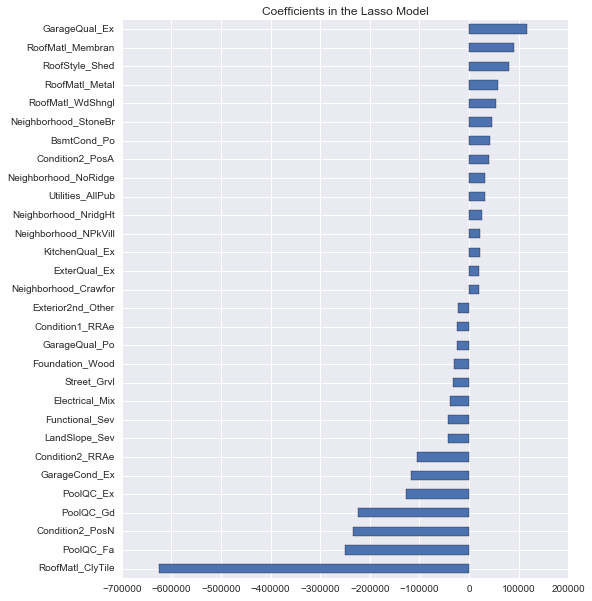

In [43]:
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

The most important positive feature is GrLivArea - the above ground area by area square feet. This definitely makes sense. Then a few other location and quality features contributed positively. Some of the negative features make less sense and would be worth looking into more - it seems like they might come from unbalanced categorical variables.
Also note that unlike the feature importance you'd get from a random forest these are actual coefficients in your model - so you can say precisely why the predicted price is what it is. The only issue here is that we log_transformed both the target and the numeric features so the actual magnitudes are a bit hard to interpret.

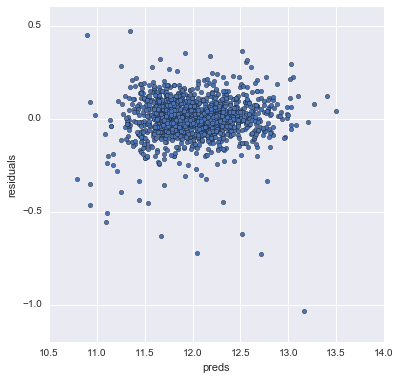

In [199]:
#let's look at the residuals as well:
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

The residual plot looks pretty good.To wrap it up let's predict on the test set and submit on the leaderboard:
## Adding an xgboost model:
Let's add an xgboost model to our linear model to see if we can improve our score:

In [200]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold

/Users/ipm/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/ipm/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [201]:
model = XGBRegressor()
n_estimators = range(500, 1200, 100)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(y, n_folds=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=4, cv=kfold)
result = grid_search.fit(X_train, y)
# summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))
means, stdevs = [], []
for params, mean_score, scores in result.grid_scores_:
	stdev = scores.std()
	means.append(mean_score)
	stdevs.append(stdev)
	print("%f (%f) with: %r" % (mean_score, stdev, params))

/Users/ipm/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:532: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


Best: 0.897559 using {'n_estimators': 900}
0.896824 (0.009773) with: {'n_estimators': 500}
0.896908 (0.010023) with: {'n_estimators': 600}
0.897102 (0.010218) with: {'n_estimators': 700}
0.897440 (0.010177) with: {'n_estimators': 800}
0.897559 (0.010321) with: {'n_estimators': 900}
0.897372 (0.010490) with: {'n_estimators': 1000}
0.897268 (0.010542) with: {'n_estimators': 1100}


In [202]:
mean_score

0.8972681401218774

In [ ]:
model = XGBRegressor()
max_depth = range(3,7,1)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(y, n_folds=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=4, cv=kfold)
result = grid_search.fit(X_train, y)
# summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))
means, stdevs = [], []
for params, mean_score, scores in result.grid_scores_:
	stdev = scores.std()
	means.append(mean_score)
	stdevs.append(stdev)
	print("%f (%f) with: %r" % (mean_score, stdev, params))

In [ ]:
model = XGBRegressor()
learning_rate = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(y, n_folds=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=4, cv=kfold)
result = grid_search.fit(X_train, y)
# summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))
means, stdevs = [], []
for params, mean_score, scores in result.grid_scores_:
	stdev = scores.std()
	means.append(mean_score)
	stdevs.append(stdev)
	print("%f (%f) with: %r" % (mean_score, stdev, params))

In [29]:
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":3, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=1000, early_stopping_rounds=100)

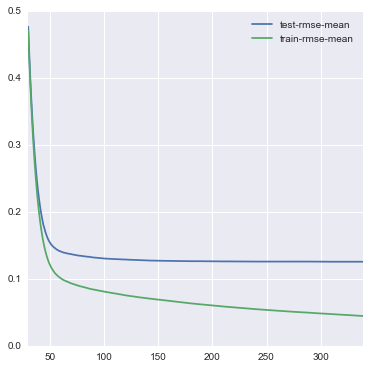

In [30]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [31]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=7, learning_rate=0.04) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.04, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [32]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

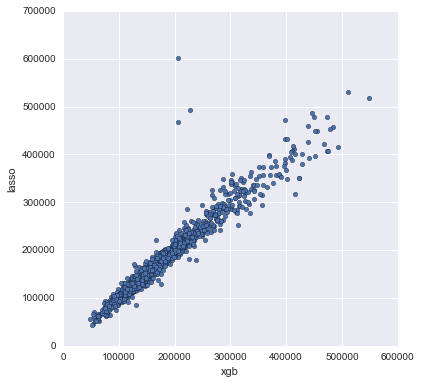

In [33]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

Many times it makes sense to take a weighted average of uncorrelated results - this usually imporoves the score although in this case it doesn't help that much.

In [41]:
preds = predictions["lasso"]+ predictions["xgb"]/ 2.0
 

In [42]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("lasso_xgb_sol.csv", index = False)

## Trying out keras?
Feedforward Neural Nets doesn't seem to work well at all...I wonder why.

In [45]:
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [46]:
X_train = StandardScaler().fit_transform(X_train)

In [47]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y, random_state = 3)

In [48]:
model = Sequential()
#model.add(Dense(256, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(1, input_dim = X_train.shape[1], W_regularizer=l1(0.001)))

model.compile(loss = "mse", optimizer = "adam")

In [49]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 1)             289         dense_input_1[0][0]              
Total params: 289
Trainable params: 289
Non-trainable params: 0
____________________________________________________________________________________________________


In [50]:
hist = model.fit(X_tr, y_tr, validation_data = (X_val, y_val))

Train on 1095 samples, validate on 365 samples
Epoch 1/10
1095/1095 [==============================] - 0s - loss: 146.4597 - val_loss: 146.5555
Epoch 2/10
1095/1095 [==============================] - 0s - loss: 144.6127 - val_loss: 147.4798
Epoch 3/10
1095/1095 [==============================] - 0s - loss: 143.1255 - val_loss: 148.6957
Epoch 4/10
1095/1095 [==============================] - 0s - loss: 141.7411 - val_loss: 150.0161
Epoch 5/10
1095/1095 [==============================] - 0s - loss: 140.3525 - val_loss: 151.5047
Epoch 6/10
1095/1095 [==============================] - 0s - loss: 138.9413 - val_loss: 152.9525
Epoch 7/10
1095/1095 [==============================] - 0s - loss: 137.6551 - val_loss: 154.4566
Epoch 8/10
1095/1095 [==============================] - 0s - loss: 136.3508 - val_loss: 156.1348
Epoch 9/10
1095/1095 [==============================] - 0s - loss: 135.0580 - val_loss: 157.9103
Epoch 10/10
1095/1095 [==============================] - 0s - loss: 133.7509 - v

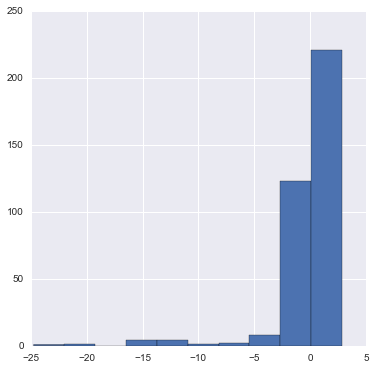

In [51]:
pd.Series(model.predict(X_val)[:,0]).hist()

In [62]:
np.array(X_test)

array([[ 3.04452244,  4.39444915,  9.36074117, ...,  0.        ,
         1.        ,  0.        ],
       [ 3.04452244,  4.40671925,  9.56577455, ...,  0.        ,
         1.        ,  0.        ],
       [ 4.11087386,  4.31748811,  9.53466773, ...,  0.        ,
         1.        ,  0.        ],
       ..., 
       [ 3.04452244,  5.08140436,  9.90353755, ...,  0.        ,
         0.        ,  0.        ],
       [ 4.4543473 ,  4.14313473,  9.25359141, ...,  0.        ,
         1.        ,  0.        ],
       [ 4.11087386,  4.31748811,  9.1724308 , ...,  0.        ,
         1.        ,  0.        ]])

In [65]:
keras_pred = model.predict(np.array(X_test))
keras_preds = pd.DataFrame({"keras":keras_pred})

ValueError: If using all scalar values, you must pass an index

In [95]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":keras_preds})
solution.to_csv("keras_sol.csv", index = False)

ValueError: Shape of passed values is (2, 365), indices imply (2, 1459)

In [100]:
X_test.columns.values

array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning_C (all)', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl',
       'Street_Pave', 'Alley_Grvl', 'Alley_Pave', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
  